# Exploring EAZY results

* Load and print results
* Galaxy card compiling color image and plots

Earendel + Sunrise Arc lensed by WHL0137:  
https://cosmic-spring.github.io/earendel.html  

Interactive color image + catalog explorer:  
https://cosmic-spring-jwst.herokuapp.com  

WHL0137 images and galaxy catalogs processed by grizli and EAZY:  
https://s3.amazonaws.com/grizli-v2/JwstMosaics/v4/index.html

Color images:  
https://www.easyzoom.com/imageaccess/126a44c2acae47df81bee5c85c98d4c7  
https://stsci.box.com/s/cq992a7cfd13wlsmu784zkioho1pga65  

EAZY:  
https://eazy-py.readthedocs.io

## Imports

In [1]:
import eazy
import eazy.hdf5

In [2]:
from astropy.table import Table
import astropy.units as u
import astropy

# for labeling color image
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.wcs as wcs

In [3]:
# to show segmentation map
import photutils

In [4]:
import numpy as np
from glob import glob
import string
from importlib import reload

import os
from os.path import expanduser
home = expanduser("~")

In [5]:
# color images
import PIL
from PIL import Image, ImageDraw, ImageFont
PIL.Image.MAX_IMAGE_PIXELS = 933120000  # allow to load large images avoiding DecompressionBombError

In [6]:
# plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
#%matplotlib inline   # non-interactive (easier for notebook scrolling)
%matplotlib notebook
plt.style.use(os.path.join(home, 'p', 'matplotlibrc.txt')) # https://matplotlib.org/tutorials/introductory/customizing.html
#plt.style.use('https://www.stsci.edu/~dcoe/matplotlibrc.txt') # https://matplotlib.org/tutorials/introductory/customizing.html
mpl_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.ticker import ScalarFormatter, FuncFormatter, MultipleLocator

## Helper functions

In [7]:
import coeSEDplot

In [8]:
def find_object_in_catalog(RA, Dec):
    object_coordinates = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
    
    # First look in segmentation map:
    x, y = image_wcs.world_to_pixel(object_coordinates)
    x = roundint(x)
    y = roundint(y)
    id = segm.data[y,x]
    
    # If nothing there, check for nearby object
    if not id:
        catalog_coordinates = SkyCoord(ra=eazy_results['ra'], dec=eazy_results['dec'])  # *u.deg
        idx, d2d, d3d = object_coordinates.match_to_catalog_sky(catalog_coordinates)
        id = eazy_results['id'][idx]
    
    return id

In [9]:
def roundint(x):
    return np.round(x).astype(int)
    
def extract_id(cat, id, idlabel='id'): # choose_object select_object
    duck_duck_goose = cat[idlabel] == int(id)
    if len(duck_duck_goose):
        obj = cat[duck_duck_goose]
    return obj[0]

# START HERE

# Load EAZY results

In [10]:
inroot = 'sunrise-grizli-v4.0-fix'
field = 'whl0137'

In [11]:
eazy_file = inroot + '.eazypy.zout.fits'
eazy_results = Table.read(eazy_file)
eazy_results[:2]

id,ra,dec,z_spec,nusefilt,z_ml,z_ml_chi2,z_ml_risk,lc_min,lc_max,z_phot,z_phot_chi2,z_phot_risk,z_min_risk,min_risk,z_raw_chi2,raw_chi2,z025,z160,z500,z840,z975,restU,restU_err,restB,restB_err,restV,restV_err,restJ,restJ_err,dL,mass,sfr,Lv,LIR,energy_abs,Lu,Lj,L1400,L2800,LHa,LOIII,LHb,LOII,MLv,Av,lwAgeV,mass_p,sfr_p,Lv_p,LIR_p,energy_abs_p,Lu_p,Lj_p,L1400_p,L2800_p,LHa_p,LOIII_p,LHb_p,LOII_p,Av_p,ssfr_p,rest120,rest120_err,rest121,rest121_err,rest414,rest414_err,rest415,rest415_err,rest416,rest416_err
,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,solMass,solMass / yr,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solMass / solLum,,Gyr,,,,,,,,,,,,,,,,,,,,,,,,,
int32,float64,float64,float64,int64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1,24.390374009600837,-8.500792839432803,-1.0,0,-1.0,-1.0,-1.0,43188281021088.9,0.0,-1.0,-1.0,-1.0,0.01,0.0,0.01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,0.0e+00,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000
2,24.3799276586953,-8.50079364079458,-1.0,0,-1.0,-1.0,-1.0,43188281021088.9,0.0,-1.0,-1.0,-1.0,0.01,0.0,0.01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,0.0e+00,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000


In [12]:
#eazy_phot = Table.read(inroot + '_phot_apcorr.fits')
#eazy_phot[:2]

In [13]:
#eazy_data = fits.open(inroot + '.eazypy.data.fits')
#eazy_data.info()

In the .h5 file, EAZY saved local paths to templates and FILTER.RES.latest.   
Link to them on your machine so we can find them now! For example:

ln /Users/dcoe/miniconda3/envs/erophot/lib/python3.10/site-packages/eazy/data/templates   
ln /Users/dcoe/miniconda3/envs/erophot/lib/python3.10/site-packages/eazy/data/filters/FILTER.RES.latest

New Carnall templates from Github sfhz:  
https://github.com/gbrammer/eazy-photoz/tree/master/templates/sfhz  
cd /Users/dcoe/miniconda3/envs/erophot/lib/python3.10/site-packages/eazy/data/templates  
ln sfhz xspline_templates

In [14]:
# Load detailed results from h5 file
h5file  = inroot + '.eazypy.h5'
eazy_run = eazy.hdf5.initialize_from_hdf5(h5file=h5file)

Read default param file: /Users/dcoe/miniconda3/envs/erophot/lib/python3.10/site-packages/eazy/data/zphot.param.default
CATALOG_FILE is a table
   >>> NOBJ = 5750
f090w_tot_1 f090w_etot_1 (363): jwst_nircam_f090w
f105w_tot_1 f105w_etot_1 (202): hst/wfc3/IR/f105w.dat
f110w_tot_1 f110w_etot_1 (241): hst/wfc3/IR/f110w.dat
f115w_tot_1 f115w_etot_1 (364): jwst_nircam_f115w
f125w_tot_1 f125w_etot_1 (203): hst/wfc3/IR/f125w.dat
f140w_tot_1 f140w_etot_1 (204): hst/wfc3/IR/f140w.dat
f150w_tot_1 f150w_etot_1 (365): jwst_nircam_f150w
f160w_tot_1 f160w_etot_1 (205): hst/wfc3/IR/f160w.dat
f200w_tot_1 f200w_etot_1 (366): jwst_nircam_f200w
f277w_tot_1 f277w_etot_1 (375): jwst_nircam_f277w
f356w_tot_1 f356w_etot_1 (376): jwst_nircam_f356w
f410m_tot_1 f410m_etot_1 (383): jwst_nircam_f410m
f435w_tot_1 f435w_etot_1 (233): hst/ACS_update_sep07/wfc_f435w_t81.dat
f444w_tot_1 f444w_etot_1 (377): jwst_nircam_f444w
f475w_tot_1 f475w_etot_1 (234): hst/ACS_update_sep07/wfc_f475w_t81.dat
f606w_tot_1 f606w_etot_1 

/Users/dcoe/miniconda3/envs/erophot/lib/python3.10/site-packages/eazy/photoz.py:1325: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Read PRIOR_FILE:  templates/prior_F160W_TAO.dat
Template grid: templates/xspline_templates/carnall_sfhz_13.param (this may take some time)
TemplateGrid: user-provided tempfilt_data
Process templates: 0.615 s


294it [00:00, 474.73it/s]


h5: read corr_sfhz_13_bin0_av0.01.fits
h5: read corr_sfhz_13_bin0_av0.25.fits
h5: read corr_sfhz_13_bin0_av0.50.fits
h5: read corr_sfhz_13_bin0_av1.00.fits
h5: read corr_sfhz_13_bin1_av0.01.fits
h5: read corr_sfhz_13_bin1_av0.25.fits
h5: read corr_sfhz_13_bin1_av0.50.fits
h5: read corr_sfhz_13_bin1_av1.00.fits
h5: read corr_sfhz_13_bin2_av0.01.fits
h5: read corr_sfhz_13_bin2_av0.50.fits
h5: read corr_sfhz_13_bin2_av1.00.fits
h5: read corr_sfhz_13_bin3_av0.01.fits
h5: read corr_sfhz_13_bin3_av0.50.fits
h5: read 4590.txt

 NNLS quitting on iteration count.
fit_best: 1.0 s (n_proc=1,  NOBJ=5539)


In [15]:
eazy_run.cat[:2]

id,ra,dec,z_spec,f090w_tot_1,f090w_etot_1,f105w_tot_1,f105w_etot_1,f110w_tot_1,f110w_etot_1,f115w_tot_1,f115w_etot_1,f125w_tot_1,f125w_etot_1,f140w_tot_1,f140w_etot_1,f150w_tot_1,f150w_etot_1,f160w_tot_1,f160w_etot_1,f200w_tot_1,f200w_etot_1,f277w_tot_1,f277w_etot_1,f356w_tot_1,f356w_etot_1,f410m_tot_1,f410m_etot_1,f435w_tot_1,f435w_etot_1,f444w_tot_1,f444w_etot_1,f475w_tot_1,f475w_etot_1,f606w_tot_1,f606w_etot_1,f814w_tot_1,f814w_etot_1
int32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1,24.390374,-8.500793,-1.00000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000
2,24.379928,-8.500794,-1.00000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000


# Combined output file: photometry + photo-z's

In [16]:
outfile = field + '_phot-eazy.ecsv'
if os.path.exists(outfile):
    print('Loading', outfile)
    catalog = astropy.io.ascii.read(outfile)

Loading whl0137_phot-eazy.ecsv


In [17]:
catalog[:2]

id,ra,dec,f090w_flux,f090w_fluxerr,f105w_flux,f105w_fluxerr,f110w_flux,f110w_fluxerr,f115w_flux,f115w_fluxerr,f125w_flux,f125w_fluxerr,f140w_flux,f140w_fluxerr,f150w_flux,f150w_fluxerr,f160w_flux,f160w_fluxerr,f200w_flux,f200w_fluxerr,f277w_flux,f277w_fluxerr,f356w_flux,f356w_fluxerr,f410m_flux,f410m_fluxerr,f435w_flux,f435w_fluxerr,f444w_flux,f444w_fluxerr,f475w_flux,f475w_fluxerr,f606w_flux,f606w_fluxerr,f814w_flux,f814w_fluxerr,z_spec,nusefilt,z_ml,z_ml_chi2,z_ml_risk,lc_min,lc_max,z_phot,z_phot_chi2,z_phot_risk,z_min_risk,min_risk,z_raw_chi2,raw_chi2,z025,z160,z500,z840,z975,restU,restU_err,restB,restB_err,restV,restV_err,restJ,restJ_err,dL,mass,sfr,Lv,LIR,energy_abs,Lu,Lj,L1400,L2800,LHa,LOIII,LHb,LOII,MLv,Av,lwAgeV,mass_p,sfr_p,Lv_p,LIR_p,energy_abs_p,Lu_p,Lj_p,L1400_p,L2800_p,LHa_p,LOIII_p,LHb_p,LOII_p,Av_p,ssfr_p,rest120,rest120_err,rest121,rest121_err,rest414,rest414_err,rest415,rest415_err,rest416,rest416_err,flux,peak,flux_radius
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,solMass,solMass / yr,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solMass / solLum,,Gyr,,,,,,,,,,,,,,,,,,,,,,,,,,uJy,uJy,
int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64
1,24.390374,-8.500793,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-1.0,0,-1.0,-1.0,-1.0,43188281021088.9,0.0,-1.0,-1.0,-1.0,0.01,0.0,0.01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,0.0e+00,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,0.02426156584177849,1.3804176471542673e-05,0.0
2,24.379928,-8.500794,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-1.0,0,-1.0,-1.0,-1.0,43188281021088.9,0.0,-1.0,-1.0,-1.0,0.01,0.0,0.01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,0.0e+00,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00

# Load color image and segmentation map

In [18]:
# Color image
field = 'whl0137'
color_image_file = '../color/%s_v4_bright.png' % field
im = Image.open(color_image_file)
color_image = np.asarray(im)
color_image = color_image[::-1]  # flip top-bottom
color_image_file

'../color/whl0137_v4_bright.png'

In [19]:
color_image.shape

(24000, 17600, 3)

In [21]:
# Segmentation map
#segm_file = os.path.join('../phot', field+'_total_detections_segm.fits.gz')
#segm_file = os.path.join('../catalogs', 'sunrise-grizli-v2-ir_seg.fits')
#segm_file = inroot + '-ir_seg.fits.gz'
segm_file = 'sunrise-grizli-v4.0-ir_20mas_seg.fits.gz'
segm_data = fits.open(segm_file)[0].data
segm = photutils.segmentation.SegmentationImage(segm_data)

In [22]:
segm_data.shape

(24000, 17600)

In [23]:
#image_files = glob('../images/*.fits')
#infile = image_files[0]
hdu = fits.open(segm_file)
idata = 0
image_wcs = wcs.WCS(hdu[idata].header, hdu)
#image_wcs

In [24]:
# Calculate x,y -- to be used for image stamps
#catalog_coordinates = SkyCoord(ra=eazy_results['ra']*u.deg, dec=eazy_results['dec']*u.deg)
catalog_coordinates = SkyCoord(ra=eazy_results['ra'], dec=eazy_results['dec'])  # *u.deg
eazy_results['x'], eazy_results['y'] = image_wcs.world_to_pixel(catalog_coordinates)
eazy_run.cat['x'], eazy_run.cat['y'] = image_wcs.world_to_pixel(catalog_coordinates)

In [25]:
eazy_results[:2]

id,ra,dec,z_spec,nusefilt,z_ml,z_ml_chi2,z_ml_risk,lc_min,lc_max,z_phot,z_phot_chi2,z_phot_risk,z_min_risk,min_risk,z_raw_chi2,raw_chi2,z025,z160,z500,z840,z975,restU,restU_err,restB,restB_err,restV,restV_err,restJ,restJ_err,dL,mass,sfr,Lv,LIR,energy_abs,Lu,Lj,L1400,L2800,LHa,LOIII,LHb,LOII,MLv,Av,lwAgeV,mass_p,sfr_p,Lv_p,LIR_p,energy_abs_p,Lu_p,Lj_p,L1400_p,L2800_p,LHa_p,LOIII_p,LHb_p,LOII_p,Av_p,ssfr_p,rest120,rest120_err,rest121,rest121_err,rest414,rest414_err,rest415,rest415_err,rest416,rest416_err,x,y
,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,solMass,solMass / yr,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solMass / solLum,,Gyr,,,,,,,,,,,,,,,,,,,,,,,,,,,
int32,float64,float64,float64,int64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64
1,24.390374009600837,-8.500792839432803,-1.0,0,-1.0,-1.0,-1.0,43188281021088.9,0.0,-1.0,-1.0,-1.0,0.01,0.0,0.01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,0.0e+00,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,844.1282141475549,2.500002358947313
2,24.3799276586953,-8.50079364079458,-1.0,0,-1.0,-1.0,-1.0,43188281021088.9,0.0,-1.0,-1.0,-1.0,0.01,0.0,0.01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,0.0e+00,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,2703.814640419486,2.5004205938921586


In [26]:
coeSEDplot.eazy_results = eazy_results
coeSEDplot.eazy_run = eazy_run
coeSEDplot.segm = segm
coeSEDplot.color_image = color_image

# Look at a galaxy

Say you're browsing the interactive image + catalog https://cosmic-spring-jwst.herokuapp.com  
and find an interesting galaxy you want to look at. It will give you the ID number that you can use here.  
Alternatively, you might have the RA, Dec coordinates, which you can use further below.

# Show galaxy

In [27]:
%matplotlib inline

In [28]:
reload(coeSEDplot)

<module 'coeSEDplot' from '/Users/dcoe/RELICS/data/whl0137-08/JWST/eazy_v4/coeSEDplot.py'>

In [29]:
id = 1686  # HST-dark galaxy
obj = extract_id(eazy_results, id)
# z_phot -1 is junk
obj

id,ra,dec,z_spec,nusefilt,z_ml,z_ml_chi2,z_ml_risk,lc_min,lc_max,z_phot,z_phot_chi2,z_phot_risk,z_min_risk,min_risk,z_raw_chi2,raw_chi2,z025,z160,z500,z840,z975,restU,restU_err,restB,restB_err,restV,restV_err,restJ,restJ_err,dL,mass,sfr,Lv,LIR,energy_abs,Lu,Lj,L1400,L2800,LHa,LOIII,LHb,LOII,MLv,Av,lwAgeV,mass_p,sfr_p,Lv_p,LIR_p,energy_abs_p,Lu_p,Lj_p,L1400_p,L2800_p,LHa_p,LOIII_p,LHb_p,LOII_p,Av_p,ssfr_p,rest120,rest120_err,rest121,rest121_err,rest414,rest414_err,rest415,rest415_err,rest416,rest416_err,x,y
,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,solMass,solMass / yr,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solMass / solLum,,Gyr,,,,,,,,,,,,,,,,,,,,,,,,,,,
int32,float64,float64,float64,int64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64
1686,24.343259161884824,-8.452282840050918,-1.0,17,3.4813101,34.826153,0.28374597,4318.8,44036.7,3.4813101,34.826153,0.28374597,3.3927274,0.27620834,3.4814665,34.8211,2.0882,2.5307,3.4627,3.5932,5.5641,0.340,0.020,0.625,0.028,1.178,0.045,10.839,0.643,3.0e+04,3.34e+11,70.763,4.14e+10,2.04e+12,2.04e+12,1.75e+10,1.57e+11,4.43e+09,1.01e+10,1.73e+09,1.64e+09,3.24e+08,3.39e+08,8.06,3.39,0.23,2.88e+11 .. 3.77e+11,50.009 .. 90.906,3.86e+10 .. 4.41e+10,1.87e+12 .. 2.20e+12,1.87e+12 .. 2.20e+12,1.58e+10 .. 1.93e+10,1.42e+11 .. 1.70e+11,2.19e+09 .. 6.14e+09,8.75e+09 .. 1.13e+10,1.37e+09 .. 2.09e+09,1.36e+09 .. 1.89e+09,2.71e+08 .. 3.71e+08,2.98e+08 .. 3.77e+08,3.26 .. 3.53,1.33e-10 .. 3.08e-10,0.028,0.006,0.085,0.006,0.170,0.010,0.592,0.025,2.834,0.102,9231.896987715169,8734.557311622473


In [30]:
obj['ssfr_p']

array([1.32684124e-10, 1.68234666e-10, 2.06842879e-10, 2.57748544e-10,
       3.08352813e-10])

/Users/dcoe/miniconda3/envs/erophot/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


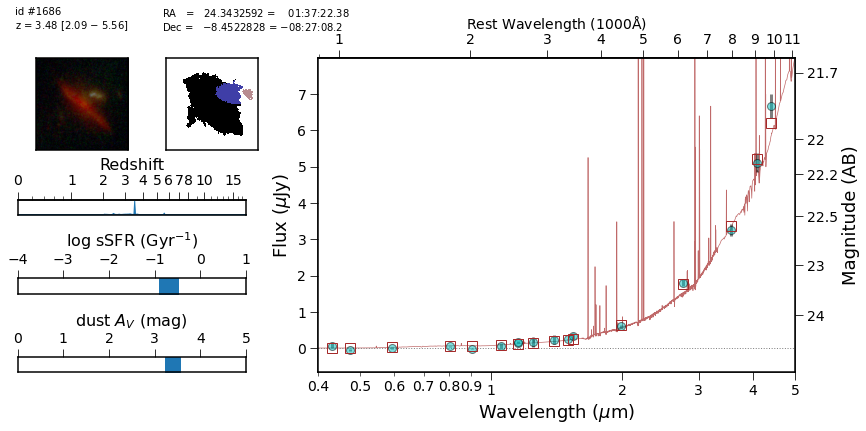

In [31]:
fig = coeSEDplot.show_galaxy_properties(id, figsize=(12, 6), lam_min=0.4, lam_max=5); #, save=True);
#plt.close(fig)

# Plot and save all SED fits

In [ ]:
#for id in catalog['id']:
for id in [] # 849, 850, 851, 785, 784, 783, 783, 678, 677, 679:
    #plt.close()
    #plt.close('all')
    obj = extract_id(eazy_results, id)
    if obj['z_phot'] < 0:
        print('Object #%d seems like junk (z_phot < 0)' % id)
    else:
        outfile = 'plots/eazy_%d.png' % id
        if os.path.exists(outfile):
            print(outfile, 'EXISTS')
        else:
            print('Object #%d plotting now...' % id)
            fig = coeSEDplot.show_galaxy_properties(id, figsize=(12, 6), lam_min=0.4, lam_max=5, save=True);
            plt.close(fig)
            #, alt_id='1.31');